In [1]:
# 1.导入库和模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

In [2]:
# 2.实例化数据集，探索数据

#下载数据
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.data.shape) #(1348, 2914)
#行是样本
#列是样本相关的所有特征

print(faces.images.shape) #(1348, 62, 47)
#1348:矩阵中图像的个数
#62:每个图像特征矩阵的行
#47:每个图像特征矩阵的列

(1348, 2914)
(1348, 62, 47)


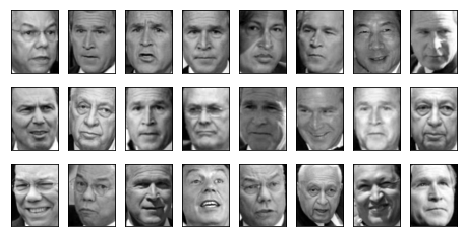

In [3]:
# 3.画图，将原始矩阵可视化

#准备画布
fig, axes = plt.subplots(3,8 #fig是画布，axes的每一个图像是fig中每一个空格
                         ,figsize=(8,4)
                         ,subplot_kw={"xticks":[],"yticks":[]} #不要显示坐标轴
                        )

#填充图像
for i, ax in enumerate(axes.flat): #enumerate惰性函数，将axes对象转化成一维进行遍历填充
    ax.imshow(faces.images[i,:,:]
              ,cmap="gray" #颜色参数网址:https://matplotlib.org/tutorials/colors/colormaps.html
             )

In [4]:
# 4.建模降维，提取新特征空间矩阵
pca = PCA(150).fit(faces.data) #sklearn在降维算法中只接受2维,2914与62*47一样，不需要分开去降维
V = pca.components_ #V是新特征空间矩阵，相当于骨架
V.shape

(150, 2914)

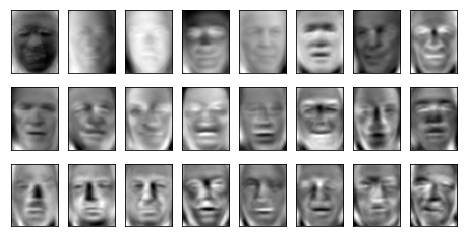

In [5]:
# 5.将新特征空间矩阵可视化
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")
#新特征空间里的特征向量们，大部分是"五官"和"亮度"相关的向量